In [5]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [6]:
# 정규화 0~1
train_scaled = train_input / 255.0

# 훈련세트, 검증세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [9]:
# 층을 구성하는 함수
def model_fn(a_layer = None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation='relu'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [10]:
model = model_fn()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8650 - loss: 0.3737
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8805 - loss: 0.3356
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8854 - loss: 0.3151
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8909 - loss: 0.3069
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8924 - loss: 0.3008


In [13]:
hist.history

{'accuracy': [0.8688958287239075,
  0.8792291879653931,
  0.8847500085830688,
  0.8900208473205566,
  0.893791675567627],
 'loss': [0.366842120885849,
  0.3398432731628418,
  0.3194056749343872,
  0.3084302544593811,
  0.29752424359321594]}

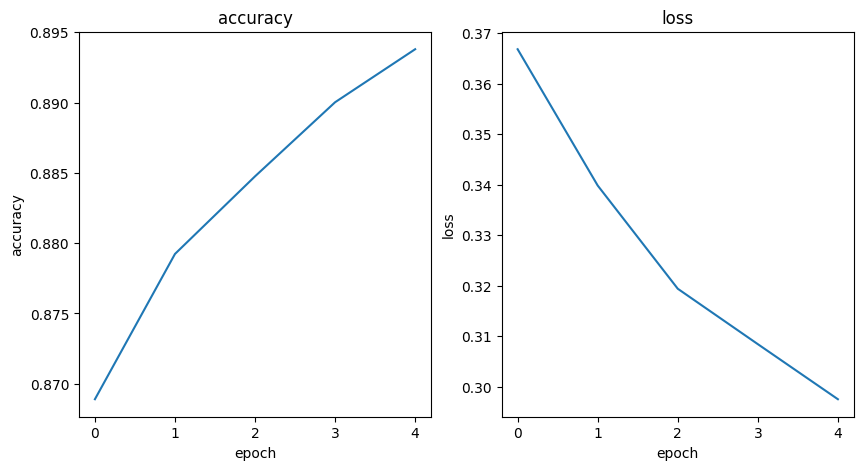

In [16]:
# 정확도, 로스 
import matplotlib.pyplot as plt
_, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist.history['accuracy'])
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')
axs[0].set_title('accuracy')

axs[1].plot(hist.history['loss'])
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')
axs[1].set_title('loss')

plt.show()

In [17]:
# 검증 손실 
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=5, validation_data=(val_scaled, val_target))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7635 - loss: 0.6813 - val_accuracy: 0.8535 - val_loss: 0.4154
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8576 - loss: 0.3996 - val_accuracy: 0.8622 - val_loss: 0.3927
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8717 - loss: 0.3513 - val_accuracy: 0.8668 - val_loss: 0.3607
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8784 - loss: 0.3383 - val_accuracy: 0.8751 - val_loss: 0.3578
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8846 - loss: 0.3227 - val_accuracy: 0.8776 - val_loss: 0.3579


In [18]:
hist.history

{'accuracy': [0.8110208511352539,
  0.859333336353302,
  0.8716874718666077,
  0.8808541893959045,
  0.8862916827201843],
 'loss': [0.5354935526847839,
  0.3917686343193054,
  0.3543466329574585,
  0.33209845423698425,
  0.3187462091445923],
 'val_accuracy': [0.8535000085830688,
  0.8622499704360962,
  0.8668333292007446,
  0.875083327293396,
  0.8775833249092102],
 'val_loss': [0.415412038564682,
  0.39271268248558044,
  0.36070528626441956,
  0.35783419013023376,
  0.35785287618637085]}

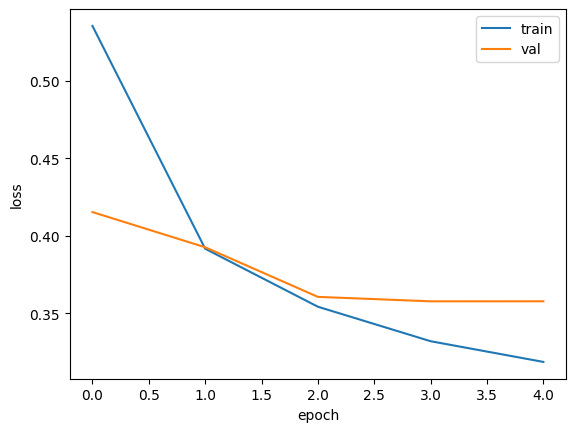

In [19]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
# 옵티마이저 - adam 
model = model_fn()
adam = keras.optimizers.Adam(learning_rate=0.001) # learning_rate : 기본값 0.1

model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7682 - loss: 0.6740 - val_accuracy: 0.8425 - val_loss: 0.4500
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8535 - loss: 0.4060 - val_accuracy: 0.8538 - val_loss: 0.4014
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8714 - loss: 0.3577 - val_accuracy: 0.8727 - val_loss: 0.3533
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8810 - loss: 0.3321 - val_accuracy: 0.8733 - val_loss: 0.3488
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8866 - loss: 0.3060 - val_accuracy: 0.8770 - val_loss: 0.3326
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8944 - loss: 0.2874 - val_accuracy: 0.8848 - val_loss: 0.3195
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8980 - loss: 0.2753 - val_accuracy: 0.8763 - val_loss: 0.3464
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9003 - loss: 0.2655 - 

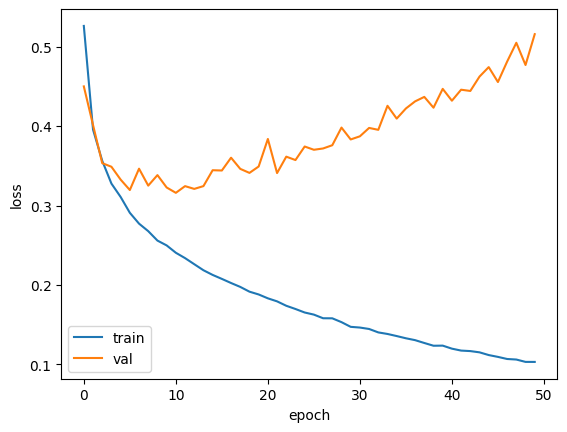

In [21]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
# 드롭아웃 : 설정된 비율만큼 은닉층의 출력을 랜덤하게 0으로 만든다 / 과대적합을 완화 / 0.1~0.5
model = model_fn(keras.layers.Dropout(0.3)) # 30% 정도 은닉층의 출력 0으로 만든다.
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target))

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7343 - loss: 0.7644 - val_accuracy: 0.8391 - val_loss: 0.4479
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8408 - loss: 0.4463 - val_accuracy: 0.8523 - val_loss: 0.4008
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8543 - loss: 0.4102 - val_accuracy: 0.8638 - val_loss: 0.3689
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8623 - loss: 0.3797 - val_accuracy: 0.8643 - val_loss: 0.3664
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8643 - loss: 0.3654 - val_accuracy: 0.8752 - val_loss: 0.3492
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8699 - loss: 0.3529 - val_accuracy: 0.8770 - val_loss: 0.3332
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8735 - loss: 0.3447 - val_accuracy: 0.8785 - val_loss: 0.3336
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8771 - loss: 0.3374 - 

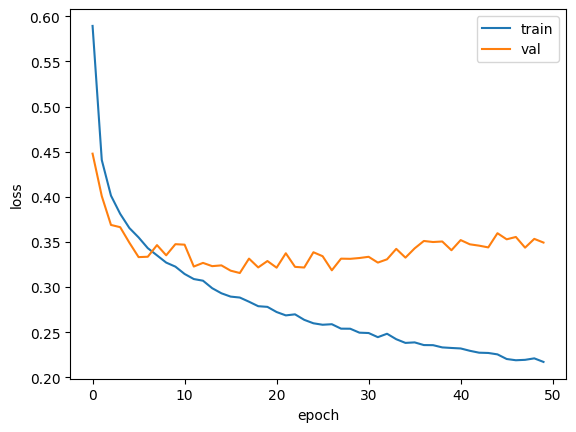

In [24]:
plt.plot(hist.history['loss'], label='train') # 훈련세트의 loss값
plt.plot(hist.history['val_loss'], label='val') # 검증세트의 loss값 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [27]:
# 모델 저장, 복원 - 모델 저장, 가중치 저장

# 가중치 저장 - model.save.weight('파일명) # 파일명 확장자 .weights.h5
model.save_weights("model.weights.h5")

In [28]:
# 모델 저장 : 구조 + 가중치 - model.save("파일명") # 파일명 확장자 .keras
model.save('model-whole.keras')

In [29]:
# 가중치 파일로 모델 복구 - 원래 모델의 구조가 필요
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')

In [32]:
import numpy as np
test_scaled = test_input / 255.0
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [34]:
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8871 - loss: 0.3818   


[0.3867591619491577, 0.8842999935150146]

In [35]:
# 전체 모델을 저장한 파일로 복구 / 구조 + 가중치
model = keras.models.load_model('model-whole.keras')

In [36]:
predictions = model.predict(test_scaled[:10])
np.argmax(predictions, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [37]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8871 - loss: 0.3818


[0.3867591619491577, 0.8842999935150146]

In [ ]:
# 콜백 - ModelCheckpoint : 검증 세트의 손실이 가장 낮은 최고의 모델을 찾아서 저장
# 콜백 - EarlyStopping : 조기종료, patience : 검증 손실이 더이상 개선되지 않는 횟수
#       monitor=['val_loss] : 기본값
#       restore_best_weights : 가장 최적의 가중치로 복구 

In [43]:
model = model_fn(keras.layers.Dropout(0.3))
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True) # 검증 세트의 손실값이 가장 낮은 모델로 저장

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7320 - loss: 0.7694 - val_accuracy: 0.8440 - val_loss: 0.4244
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8344 - loss: 0.4547 - val_accuracy: 0.8636 - val_loss: 0.3869
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8495 - loss: 0.4158 - val_accuracy: 0.8646 - val_loss: 0.3679
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8610 - loss: 0.3873 - val_accuracy: 0.8693 - val_loss: 0.3590
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8657 - loss: 0.3659 - val_accuracy: 0.8725 - val_loss: 0.3456
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8687 - loss: 0.3584 - val_accuracy: 0.8733 - val_loss: 0.3430
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8761 - loss: 0.3401 - val_accuracy: 0.8779 - val_loss: 0.3353
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3445 - 

In [42]:
model = keras.models.load_model('best-model.keras')

In [44]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.8731 - loss: 0.3497


[0.3544251024723053, 0.873199999332428]